In [178]:
#Importing necessary modules and libraries to perform analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as opx
import yfinance as yf

# Importing the Data

In [179]:
#Loading the excel file which contains raw data for the analysis
df = pd.read_excel("C:\\Users\\Karthi\\OneDrive\\Desktop\\FIN6368 IP_Final.xlsx")

In [180]:
# Split the existing raw datas into two groups, 
# Group 1 - Companies with successful IPOs (Having a positive return on the end of it's first trading day)
# Group 2 - Companies with unsuccessful IPOs (Having a negative return on the end of it's first trading day)
Successful_IPO_df = df[df['1 Day % Return'] > 0]
Unsuccessful_IPO_df = df[df['1 Day % Return'] < 0]

In [181]:
# Save this group in a new dataframe
Successful_IPO_df.to_csv('Successful_IPO.csv', index=False)

In [182]:
# Save this group in a new dataframe
Unsuccessful_IPO_df.to_csv('Unsuccessful_IPO.csv', index=False)

# Cleaning the data

Inorder to analyze the data in a way that makes sense, I'm first going to arange it in a way, so that the metrics (Total Revenue, Gross Profit, Net Income, Cash flow from Operations, Cash And Equivalents, Total Assets, Return on Assets %, Cash And Equivalents as a percentage of Total assets at the time of IPO (Financial statements prior to IPO date). Doing so we can have a better picture of the company's financial and operating strength. We do that for both the successful IPO companies and the Unsucessful IPO companies. While doing so, I am computing benchmark values (Using averages) for each of these metric using the data from the susscessfully IPO'd companies. While doing so we can effectively plot these data in charts and visually compare the companies financial strength side by side.

#### Total Revenue and Gross Profit (Successful Comps)

In [183]:
# Filter the data
T_2_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2019-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2020-01-01')][['Total Revenue [T - 2]', 'Gross Profit [T - 2]']]
T_1_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2020-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2021-01-01')][['Total Revenue [T - 1]', 'Gross Profit [T - 1]']]
T_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2021-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2022-04-01')][['Total Revenue [T]', 'Gross Profit [T]']]

# Rename the columns
T_2_data = T_2_data.rename(columns={'Total Revenue [T - 2]': 'Total Revenue', 'Gross Profit [T - 2]': 'Gross Profit'})
T_1_data = T_1_data.rename(columns={'Total Revenue [T - 1]': 'Total Revenue', 'Gross Profit [T - 1]': 'Gross Profit'})
T_data = T_data.rename(columns={'Total Revenue [T]': 'Total Revenue', 'Gross Profit [T]': 'Gross Profit'})

# Concatenate the dataframes
SGP_df = pd.concat([T_2_data, T_1_data, T_data], axis=0)
SGP_df.to_csv('SGP_df.csv', index=False)

#### BenchMark Total Revenue and Gross Profit

In [184]:
#lets compute the average total revenue and gross profit these companies, the ones with a successful IPO, at the time of IPO.
S_avg_total_revenue = SGP_df['Total Revenue'].mean()
S_avg_gross_profit = SGP_df['Gross Profit'].mean()
S_avg_gpm = S_avg_gross_profit / S_avg_total_revenue

print("Average Total Revenue: ", S_avg_total_revenue)
print("Average Gross Profit: ", S_avg_gross_profit)
print("Average Gross Profit Margin: ",S_avg_gpm*100)

Average Total Revenue:  797480085.2272727
Average Gross Profit:  334088556.8181818
Average Gross Profit Margin:  41.89302817799775


#### Total Revenue and Gross Profit(Unsuccessful Comps)

In [185]:
# Filter the data
T_2_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2019-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2020-01-01')][['Total Revenue [T - 2]', 'Gross Profit [T - 2]']]
T_1_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2020-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2021-01-01')][['Total Revenue [T - 1]', 'Gross Profit [T - 1]']]
T_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2021-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2022-04-01')][['Total Revenue [T]', 'Gross Profit [T]']]

# Rename the columns
T_2_data = T_2_data.rename(columns={'Total Revenue [T - 2]': 'Total Revenue', 'Gross Profit [T - 2]': 'Gross Profit'})
T_1_data = T_1_data.rename(columns={'Total Revenue [T - 1]': 'Total Revenue', 'Gross Profit [T - 1]': 'Gross Profit'})
T_data = T_data.rename(columns={'Total Revenue [T]': 'Total Revenue', 'Gross Profit [T]': 'Gross Profit'})

# Concatenate the dataframes
UGP_df = pd.concat([T_2_data, T_1_data, T_data], axis=0)
UGP_df.to_csv('UGP_df.csv', index=False)

In [186]:
#lets compute the average total revenue and gross profit these companies, the ones with an Unsuccessful ipo, at the time of IPO.
U_avg_total_revenue = UGP_df['Total Revenue'].mean()
U_avg_gross_profit = UGP_df['Gross Profit'].mean()
U_avg_gpm = U_avg_gross_profit / U_avg_total_revenue

print("Average Total Revenue: ", U_avg_total_revenue)
print("Average Gross Profit: ", U_avg_gross_profit)
print("Average Gross Profit margin: ", U_avg_gpm*100)

Average Total Revenue:  1043821636.3636364
Average Gross Profit:  369338490.90909094
Average Gross Profit margin:  35.383295195504495


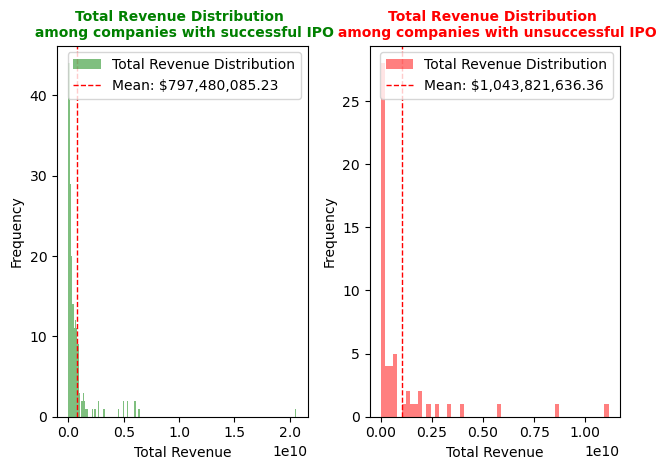

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_ALL, '')

# Load the data frames
SGP_Chart_df = pd.read_csv('SGP_df.csv')
UGP_Chart_df = pd.read_csv('UGP_df.csv')

# Set the columns to plot
col1 = 'Total Revenue'
col2 = 'Total Revenue'

# Create the first chart
plt.subplot(1, 2, 1)
plt.hist(SGP_Chart_df[col1], bins=len(SGP_Chart_df), alpha=0.5, label='Total Revenue Distribution', color='Green')
mean_SGP = SGP_Chart_df[col1].mean()
plt.axvline(mean_SGP, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {locale.currency(mean_SGP, grouping=True)}')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.title('Total Revenue Distribution \n among companies with successful IPO', fontweight='bold', color='Green', fontsize=10)
plt.legend()

# Create the second chart
plt.subplot(1, 2, 2)
plt.hist(UGP_Chart_df[col2], bins=len(UGP_Chart_df), alpha=0.5, label='Total Revenue Distribution', color='Red')
mean_UGP = UGP_Chart_df[col2].mean()
plt.axvline(mean_UGP, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {locale.currency(mean_UGP, grouping=True)}')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.title('Total Revenue Distribution \n among companies with unsuccessful IPO', fontweight='bold', color='Red', fontsize=10)
plt.legend()

# Show the plots
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()


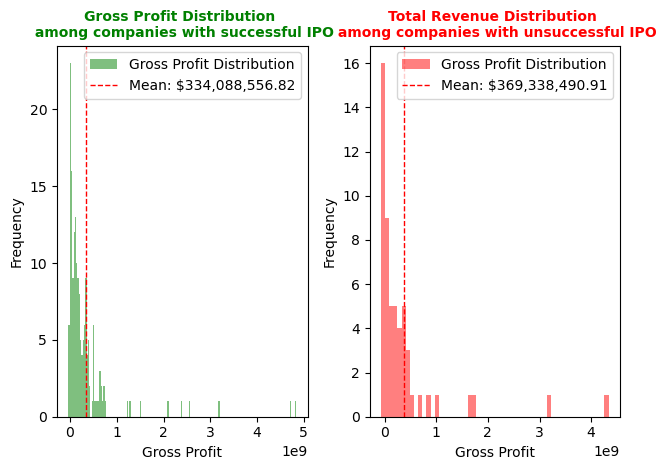

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

# Load the data frames
SGP_Chart_df = pd.read_csv('SGP_df.csv')
UGP_Chart_df = pd.read_csv('UGP_df.csv')

# Set the columns to plot
col1 = 'Gross Profit'
col2 = 'Gross Profit'

# Create the first chart
plt.subplot(1, 2, 1)
plt.hist(SGP_Chart_df[col1], bins=len(SGP_Chart_df), alpha=0.5, label='Gross Profit Distribution', color='Green')
mean_SGP = SGP_Chart_df[col1].mean()
plt.axvline(mean_SGP, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {locale.currency(mean_SGP, grouping=True)}')
plt.xlabel('Gross Profit')
plt.ylabel('Frequency')
plt.title('Gross Profit Distribution \n among companies with successful IPO', fontweight='bold', color='Green', fontsize=10)
plt.legend()

# Create the second chart
plt.subplot(1, 2, 2)
plt.hist(UGP_Chart_df[col2], bins=len(UGP_Chart_df), alpha=0.5, label='Gross Profit Distribution', color='Red')
mean_UGP = UGP_Chart_df[col2].mean()
plt.axvline(mean_UGP, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {locale.currency(mean_UGP, grouping=True)}')
plt.xlabel('Gross Profit')
plt.ylabel('Frequency')
plt.title('Total Revenue Distribution \n among companies with unsuccessful IPO', fontweight='bold', color='Red', fontsize=10)
plt.legend()

# Show the plots
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()


#### Net Income (Successful Comps)

In [189]:
# Filter the data
T_2_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2019-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2020-01-01')][['Total Revenue [T - 2]', 'Net Income [T - 2]']]
T_1_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2020-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2021-01-01')][['Total Revenue [T - 1]', 'Net Income [T - 1]']]
T_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2021-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2022-04-01')][['Total Revenue [T]', 'Net Income [T]']]

# Rename the columns
T_2_data = T_2_data.rename(columns={'Total Revenue [T - 2]': 'Total Revenue', 'Net Income [T - 2]': 'Net Income'})
T_1_data = T_1_data.rename(columns={'Total Revenue [T - 1]': 'Total Revenue', 'Net Income [T - 1]': 'Net Income'})
T_data = T_data.rename(columns={'Total Revenue [T]': 'Total Revenue', 'Net Income [T]': 'Net Income'})

# Concatenate the dataframes
SNP_df = pd.concat([T_2_data, T_1_data, T_data], axis=0)
SNP_df.to_csv('SNP_df.csv', index=False)

#### Benchmark Net Income (Successful Comps)

In [190]:
#lets compute the average net income these companies, the ones with a successful IPO, at the time of IPO.
S_avg_net_income = SNP_df['Net Income'].mean()
S_avg_npm = S_avg_net_income / S_avg_total_revenue

print("Average Net Income: ", S_avg_gross_profit)
print("Average Net Profit Margin :", S_avg_npm*100)


Average Net Income:  334088556.8181818
Average Net Profit Margin : -6.4378851865743725


#### Net Income (Unsuccessful Comps)

In [191]:
# Filter the data
T_2_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2019-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2020-01-01')][['Total Revenue [T - 2]', 'Net Income [T - 2]']]
T_1_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2020-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2021-01-01')][['Total Revenue [T - 1]', 'Net Income [T - 1]']]
T_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2021-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2022-04-01')][['Total Revenue [T]', 'Net Income [T]']]

# Rename the columns
T_2_data = T_2_data.rename(columns={'Total Revenue [T - 2]': 'Total Revenue', 'Net Income [T - 2]': 'Net Income'})
T_1_data = T_1_data.rename(columns={'Total Revenue [T - 1]': 'Total Revenue', 'Net Income [T - 1]': 'Net Income'})
T_data = T_data.rename(columns={'Total Revenue [T]': 'Total Revenue', 'Net Income [T]': 'Net Income'})

# Concatenate the dataframes
UNP_df = pd.concat([T_2_data, T_1_data, T_data], axis=0)
UNP_df.to_csv('UNP_df.csv', index=False)

In [192]:
#lets compute the average net income these companies, the ones with a Unsuccessful IPO, at the time of IPO.
U_avg_net_income = UNP_df['Net Income'].mean()
U_avg_npm = U_avg_net_income / U_avg_total_revenue

print("Average Net Income: ", U_avg_gross_profit)
print("Average Net Profit Margin :", U_avg_npm*100)


Average Net Income:  369338490.90909094
Average Net Profit Margin : -17.37408289364658


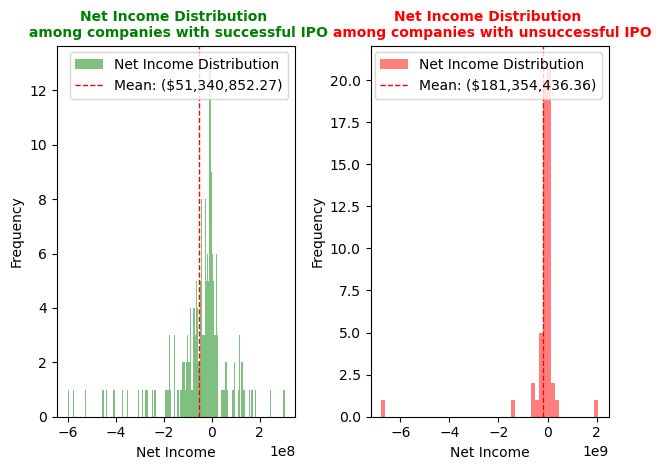

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

# Load the data frames
SNP_Chart_df = pd.read_csv('SNP_df.csv')
UNP_Chart_df = pd.read_csv('UNP_df.csv')

# Set the columns to plot
col1 = 'Net Income'
col2 = 'Net Income'

# Create the first chart
plt.subplot(1, 2, 1)
plt.hist(SNP_Chart_df[col1], bins=len(SNP_Chart_df), alpha=0.5, label='Net Income Distribution', color='Green')
mean_SNP = SNP_Chart_df[col1].mean()
plt.axvline(mean_SNP, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {locale.currency(mean_SNP, grouping=True)}')
plt.xlabel('Net Income')
plt.ylabel('Frequency')
plt.title('Net Income Distribution \n among companies with successful IPO', fontweight='bold', color='Green', fontsize=10)
plt.legend()

# Create the second chart
plt.subplot(1, 2, 2)
plt.hist(UNP_Chart_df[col2], bins=len(UNP_Chart_df), alpha=0.5, label='Net Income Distribution', color='Red')
mean_UNP = UNP_Chart_df[col2].mean()
plt.axvline(mean_UNP, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {locale.currency(mean_UNP, grouping=True)}')
plt.xlabel('Net Income')
plt.ylabel('Frequency')
plt.title('Net Income Distribution \n among companies with unsuccessful IPO', fontweight='bold', color='Red', fontsize=10)
plt.legend()

# Show the plots
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()


#### Cash Flow from Operations (Successful Comps)

In [194]:
# Filter the data
T_2_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2019-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2020-01-01')][['Cash from Ops. [T - 2]']]
T_1_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2020-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2021-01-01')][['Cash from Ops. [T - 1]']]
T_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2021-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2022-04-01')][['Cash from Ops. [T]']]

# Rename the columns
T_2_data = T_2_data.rename(columns={'Cash from Ops. [T - 2]': 'Cash from Ops'})
T_1_data = T_1_data.rename(columns={'Cash from Ops. [T - 1]': 'Cash from Ops'})
T_data = T_data.rename(columns={'Cash from Ops. [T]': 'Cash from Ops'})

# Concatenate the dataframes
SCFO_df = pd.concat([T_2_data, T_1_data, T_data], axis=0)
SCFO_df.to_csv('SCFO_df.csv', index=False)

#### Benchmark Cash Flow from Operations (Successful Comps)

In [195]:
S_avg_cash_from_ops = SCFO_df['Cash from Ops'].mean()
print("Average Cash from operations: ", S_avg_cash_from_ops)

Average Cash from operations:  41595977.27272727


In [196]:
#Lets eleminate the size effect from this metric by computing the average cashflow from operations as a percentage of total revenue
S_avg_cfo_by_total_revenue = S_avg_cash_from_ops / S_avg_total_revenue
print("Average Cash from Operations as a percentage of total revenue :", S_avg_cfo_by_total_revenue*100)

Average Cash from Operations as a percentage of total revenue : 5.215926772751058


#### Cash Flow from Operations (Unsuccessful Comps)

In [197]:
# Filter the data
T_2_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2019-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2020-01-01')][['Cash from Ops. [T - 2]']]
T_1_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2020-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2021-01-01')][['Cash from Ops. [T - 1]']]
T_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2021-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2022-04-01')][['Cash from Ops. [T]']]

# Rename the columns
T_2_data = T_2_data.rename(columns={'Cash from Ops. [T - 2]': 'Cash from Ops'})
T_1_data = T_1_data.rename(columns={'Cash from Ops. [T - 1]': 'Cash from Ops'})
T_data = T_data.rename(columns={'Cash from Ops. [T]': 'Cash from Ops'})

# Concatenate the dataframes
UCFO_df = pd.concat([T_2_data, T_1_data, T_data], axis=0)
UCFO_df.to_csv('UCFO_df.csv', index=False)

In [198]:
U_avg_cash_from_ops = UCFO_df['Cash from Ops'].mean()
print("Average Cash from operations: ", U_avg_cash_from_ops)

Average Cash from operations:  -20607927.272727273


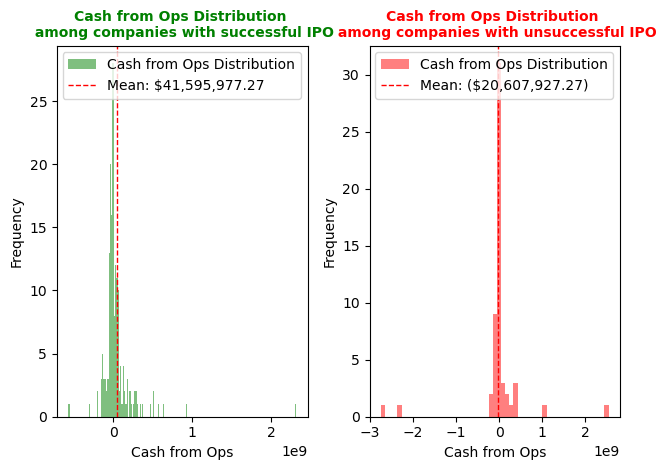

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

# Load the data frames
SCFO_Chart_df = pd.read_csv('SCFO_df.csv')
UCFO_Chart_df = pd.read_csv('UCFO_df.csv')

# Set the columns to plot
col1 = 'Cash from Ops'
col2 = 'Cash from Ops'

# Create the first chart
plt.subplot(1, 2, 1)
plt.hist(SCFO_Chart_df[col1], bins=len(SCFO_Chart_df), alpha=0.5, label='Cash from Ops Distribution', color='Green')
mean_SCFO = S_avg_cash_from_ops
plt.axvline(mean_SCFO, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {locale.currency(mean_SCFO, grouping=True)}')
plt.xlabel('Cash from Ops')
plt.ylabel('Frequency')
plt.title('Cash from Ops Distribution \n among companies with successful IPO', fontweight='bold', color='Green', fontsize=10)
plt.legend()

# Create the second chart
plt.subplot(1, 2, 2)
plt.hist(UCFO_Chart_df[col2], bins=len(UCFO_Chart_df), alpha=0.5, label='Cash from Ops Distribution', color='Red')
mean_UCFO = U_avg_cash_from_ops
plt.axvline(mean_UCFO, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {locale.currency(mean_UCFO, grouping=True)}')
plt.xlabel('Cash from Ops')
plt.ylabel('Frequency')
plt.title('Cash from Ops Distribution \n among companies with unsuccessful IPO', fontweight='bold', color='Red', fontsize=10)
plt.legend()

# Show the plots
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()


In [200]:
#Lets eleminate the size effect from this metric by computing the average cashflow from operations as a percentage of total revenue
U_avg_cfo_by_total_revenue = U_avg_cash_from_ops / U_avg_total_revenue
print("Average Cash from Operations as a percentage of total revenue :", U_avg_cfo_by_total_revenue*100)

Average Cash from Operations as a percentage of total revenue : -1.974276691994923


#### Return on Assets (Successful Comps)

In [201]:
# Filter the data
T_2_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2019-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2020-01-01')][['Return on Assets % [T - 2]']]
T_1_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2020-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2021-01-01')][['Return on Assets % [T - 1]']]
T_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2021-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2022-04-01')][['Return on Assets % [T]']]

# Rename the columns
T_2_data = T_2_data.rename(columns={'Return on Assets % [T - 2]': 'Return on Assets %'})
T_1_data = T_1_data.rename(columns={'Return on Assets % [T - 1]': 'Return on Assets %'})
T_data = T_data.rename(columns={'Return on Assets % [T]': 'Return on Assets %'})

# Concatenate the dataframes
SROA_df = pd.concat([T_2_data, T_1_data, T_data], axis=0)

# Since some of the data are not available lets replace "NM" values with 0
SROA_df = SROA_df.replace("NM", 0)
SROA_df.to_csv('SROA_df.csv', index=False)

#### Benchmark Return on Assets (Successful Comps)

In [202]:
S_avg_ROA = SROA_df['Return on Assets %'].mean()
print("Average Return on Assets: ", S_avg_ROA*100)

Average Return on Assets:  -7.922857954545457


#### Return on Assets (Unsuccessful Comps)

In [203]:
# Filter the data
T_2_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2019-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2020-01-01')][['Return on Assets % [T - 2]']]
T_1_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2020-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2021-01-01')][['Return on Assets % [T - 1]']]
T_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2021-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2022-04-01')][['Return on Assets % [T]']]

# Rename the columns
T_2_data = T_2_data.rename(columns={'Return on Assets % [T - 2]': 'Return on Assets %'})
T_1_data = T_1_data.rename(columns={'Return on Assets % [T - 1]': 'Return on Assets %'})
T_data = T_data.rename(columns={'Return on Assets % [T]': 'Return on Assets %'})

# Concatenate the dataframes
UROA_df = pd.concat([T_2_data, T_1_data, T_data], axis=0)
UROA_df.to_csv('UROA_df.csv', index=False)

In [204]:
U_avg_ROA = UROA_df['Return on Assets %'].mean()
print("Average Return on Assets: ", U_avg_ROA*100)

Average Return on Assets:  -11.272236363636361


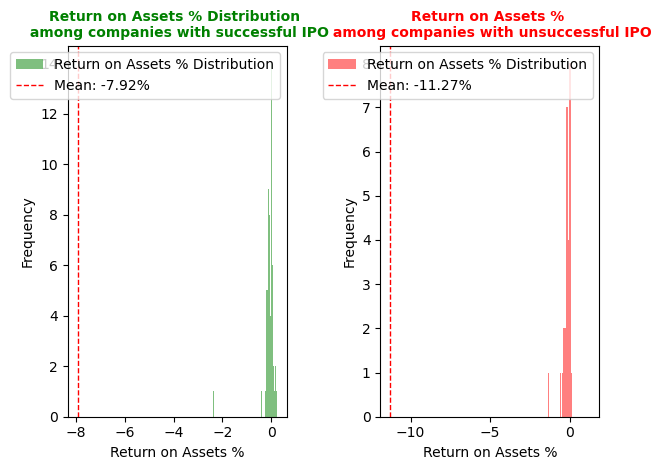

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data frames
SROA_Chart_df = pd.read_csv('SROA_df.csv')
UROA_Chart_df = pd.read_csv('UROA_df.csv')

# Set the columns to plot
col1 = 'Return on Assets %'
col2 = 'Return on Assets %'

# Create the first chart
plt.subplot(1, 2, 1)
plt.hist(SROA_Chart_df[col1], bins=len(SROA_Chart_df), alpha=0.5, label='Return on Assets % Distribution', color='Green')
mean_SROA = SROA_Chart_df[col1].mean()*100
plt.axvline(mean_SROA, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_SROA:.2f}%')
plt.xlabel('Return on Assets %')
plt.ylabel('Frequency')
plt.title('Return on Assets % Distribution \n among companies with successful IPO', fontweight='bold', color='Green', fontsize=10)
plt.legend()

# Create the second chart
plt.subplot(1, 2, 2)
plt.hist(UROA_Chart_df[col2], bins=len(UROA_Chart_df), alpha=0.5, label='Return on Assets % Distribution', color='Red')
mean_UROA = UROA_Chart_df[col2].mean()*100
plt.axvline(mean_UROA, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_UROA:.2f}%')
plt.xlabel('Return on Assets %')
plt.ylabel('Frequency')
plt.title('Return on Assets % \n among companies with unsuccessful IPO', fontweight='bold', color='Red', fontsize=10)
plt.legend()

# Show the plots
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Total Assets (Successful Comps)

In [206]:
# since we have the ROA for all companies, except one exception, and we also hav the net income of these companies we can compute the total assets.
# Join the two dataframes on the date column
S_Total_Assets_df = SNP_df.join(SROA_df, how='inner')

In [207]:
# Filter the data to find occurrences of negative net income and positive ROA
S_negative_income_positive_roa = S_Total_Assets_df[(S_Total_Assets_df['Net Income'] < 0) & (S_Total_Assets_df['Return on Assets %'] > 0)]

# Print the number of occurrences
print("Number of occurrences with negative net income and positive ROA:", len(S_negative_income_positive_roa))

# Print the occurrences
print("Occurrences with negative net income and positive ROA:")

Number of occurrences with negative net income and positive ROA: 17
Occurrences with negative net income and positive ROA:


In [208]:
# Compute Total Assets and store in a new column
S_Total_Assets_df['Total Assets'] = S_Total_Assets_df['Net Income'] / (S_Total_Assets_df['Return on Assets %'])

# The resulting math might resut in negative total asstets for the entries with negative ROA, since the Total asstes cannot be negative we have to convert them back into positive
S_Total_Assets_df['Total Assets'] = abs(S_Total_Assets_df['Total Assets'])

S_TA_df = S_Total_Assets_df[['Total Assets']].copy()
S_TA_df.to_csv('S_TA_df.csv', index=False)

#### Cash and Cash Equivalents as a percentage of Total Assets (Successful Comps)

In [209]:
# Filter the data
T_2_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2019-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2020-01-01')][['Cash And Equivalents [T - 2]']]
T_1_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2020-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2021-01-01')][['Cash And Equivalents [T - 1]']]
T_data = Successful_IPO_df[(Successful_IPO_df['Equity Offering Date'] >= '2021-01-01') & (Successful_IPO_df['Equity Offering Date'] < '2022-04-01')][['Cash And Equivalents [T]']]

# Rename the columns
T_2_data = T_2_data.rename(columns={'Cash And Equivalents [T - 2]': 'Cash And Equivalents'})
T_1_data = T_1_data.rename(columns={'Cash And Equivalents [T - 1]': 'Cash And Equivalents'})
T_data = T_data.rename(columns={'Cash And Equivalents [T]': 'Cash And Equivalents'})

# Concatenate the dataframes
S_CCE_df = pd.concat([T_2_data, T_1_data, T_data], axis=0)
S_CCE_df.to_csv('S_CCE_df.csv', index=False)

In [210]:
# Join the two dataframes on the date column
S_CCE_TA_df = S_TA_df.join(S_CCE_df, how='inner')

# Compute Total Assets and store in a new column
S_CCE_TA_df['Cash And Equivalents as a percentage of Total assets'] = S_CCE_df['Cash And Equivalents'] / (S_TA_df['Total Assets'])

S_CE_TA_df = S_CCE_TA_df[['Cash And Equivalents as a percentage of Total assets']].copy()
S_CE_TA_df.to_csv('S_CE_TA_df.csv', index=False)

#### Benchmark Cash and Cash Equivalents as a Percentage of Total Assets

In [211]:
S_avg_CEofTA = S_CE_TA_df['Cash And Equivalents as a percentage of Total assets'].mean()
print("Average Cash and Equivalents as a percentage of Total Asstes: ", S_avg_CEofTA*100)

Average Cash and Equivalents as a percentage of Total Asstes:  37.94266687872376


#### Total Assets (Unsucessful Comps)

In [212]:
# Join the two dataframes on the date column
U_Total_Assets_df = UNP_df.join(UROA_df, how='inner')

In [213]:
# Filter the data to find occurrences of negative net income and positive ROA
U_negative_income_positive_roa = U_Total_Assets_df[(U_Total_Assets_df['Net Income'] < 0) & (U_Total_Assets_df['Return on Assets %'] > 0)]

# Print the number of occurrences
print("Number of occurrences with negative net income and positive ROA:", len(U_negative_income_positive_roa))

# Print the occurrences
print("Occurrences with negative net income and positive ROA:")

Number of occurrences with negative net income and positive ROA: 7
Occurrences with negative net income and positive ROA:


In [214]:
# Compute Total Assets and store in a new column
U_Total_Assets_df['Total Assets'] = U_Total_Assets_df['Net Income'] / (U_Total_Assets_df['Return on Assets %'])

# The resulting math might resut in negative total asstets for the entries with negative ROA, since the Total asstes cannot be negative we have to convert them back into positive
U_Total_Assets_df['Total Assets'] = abs(U_Total_Assets_df['Total Assets'])

U_TA_df = U_Total_Assets_df[['Total Assets']].copy()
U_TA_df.to_csv('U_TA_df.csv', index=False)

#### Cash and Cash Equivalents (Unsuccessful Comps)

In [215]:
# Filter the data
T_2_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2019-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2020-01-01')][['Cash And Equivalents [T - 2]']]
T_1_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2020-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2021-01-01')][['Cash And Equivalents [T - 1]']]
T_data = Unsuccessful_IPO_df[(Unsuccessful_IPO_df['Equity Offering Date'] >= '2021-01-01') & (Unsuccessful_IPO_df['Equity Offering Date'] < '2022-04-01')][['Cash And Equivalents [T]']]

# Rename the columns
T_2_data = T_2_data.rename(columns={'Cash And Equivalents [T - 2]': 'Cash And Equivalents'})
T_1_data = T_1_data.rename(columns={'Cash And Equivalents [T - 1]': 'Cash And Equivalents'})
T_data = T_data.rename(columns={'Cash And Equivalents [T]': 'Cash And Equivalents'})

# Concatenate the dataframes
U_CCE_df = pd.concat([T_2_data, T_1_data, T_data], axis=0)
U_CCE_df.to_csv('U_CCE_df.csv', index=False)

#### Cash and Cash Equivalents as a Percentage of Total Assets

In [216]:
# Join the two dataframes on the date column
U_CCE_TA_df = U_TA_df.join(U_CCE_df, how='inner')

# Compute Total Assets and store in a new column
U_CCE_TA_df['Cash And Equivalents as a percentage of Total assets'] = U_CCE_df['Cash And Equivalents'] / (U_TA_df['Total Assets'])
U_CE_TA_df = U_CCE_TA_df[['Cash And Equivalents as a percentage of Total assets']].copy()
U_CE_TA_df.to_csv('U_CE_TA_df.csv', index=False)

In [217]:
U_avg_CEofTA = U_CE_TA_df['Cash And Equivalents as a percentage of Total assets'].mean()
print("Average Cash and Equivalents as a percentage of Total Asstes: ", U_avg_CEofTA*100)

Average Cash and Equivalents as a percentage of Total Asstes:  28.343527549318402


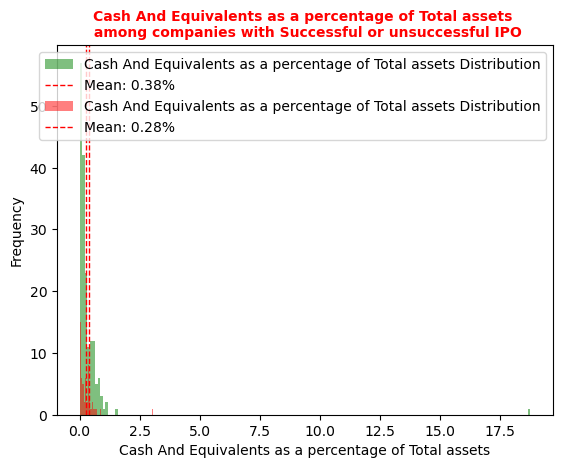

In [218]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data frames
S_CE_TA_Chart_df = pd.read_csv('S_CE_TA_df.csv')
U_CE_TA_Chart_df = pd.read_csv('U_CE_TA_df.csv')

# Set the columns to plot
col1 = 'Cash And Equivalents as a percentage of Total assets'
col2 = 'Cash And Equivalents as a percentage of Total assets'

# Create the first chart
plt.hist(S_CE_TA_Chart_df[col1], bins=len(S_CE_TA_Chart_df), alpha=0.5, label='Cash And Equivalents as a percentage of Total assets Distribution', color='Green')
mean_S_CE_TA = S_CE_TA_Chart_df[col1].mean()
plt.axvline(mean_S_CE_TA, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_S_CE_TA:.2f}%')
plt.xlabel('Cash And Equivalents as a percentage of Total assets')
plt.ylabel('Frequency')
plt.title('Cash And Equivalents as a percentage of Total assets Distribution \n among companies with successful IPO', fontweight='bold', color='Green', fontsize=10)
plt.legend()

# Create the second chart
plt.hist(U_CE_TA_Chart_df[col2], bins=len(U_CE_TA_Chart_df), alpha=0.5, label='Cash And Equivalents as a percentage of Total assets Distribution', color='Red')
mean_U_CE_TA = U_CE_TA_Chart_df[col2].mean()
plt.axvline(mean_U_CE_TA, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_U_CE_TA:.2f}%')
plt.xlabel('Cash And Equivalents as a percentage of Total assets')
plt.ylabel('Frequency')
plt.title('Cash And Equivalents as a percentage of Total assets \n among companies with Successful or unsuccessful IPO', fontweight='bold', color='Red', fontsize=10)
plt.legend()

# Show the plots
plt.show()

In [219]:
# Droppping unecessary columns and adding the components I just computed
Revised_S_df = Successful_IPO_df.drop(columns=['Total Revenue [T - 2]', 'Total Revenue [T - 1]', 'Total Revenue [T]', 'Gross Profit [T - 2]', 'Gross Profit [T - 1]', 'Gross Profit [T]', 'Net Income [T - 2]', 'Net Income [T - 1]', 'Net Income [T]', 'Cash And Equivalents [T - 2]', 'Cash And Equivalents [T - 1]', 'Cash And Equivalents [T]', 'Cash from Ops. [T - 2]', 'Cash from Ops. [T - 1]', 'Cash from Ops. [T]', 'Return on Assets % [T - 2]', 'Return on Assets % [T - 1]', 'Return on Assets % [T]', 'Gross Margin % [T - 2]', 'Gross Margin % [T - 1]', 'Gross Margin % [T]', 'Net Income Margin % [T - 2]', 'Net Income Margin % [T - 1]', 'Net Income Margin % [T]', 'Total Revenues, 3 Yr CAGR % [T] (%)', 'Gross Profit, 3 Yr CAGR % [T] (%)', 'Net Income, 3 Yr CAGR % [T] (%)', 'Basic EPS [T - 1]', 'Basic EPS [T]'])

Sus_df = Revised_S_df.join([SGP_df, SNP_df["Net Income"], SCFO_df, SROA_df, S_TA_df, S_CCE_df, S_CE_TA_df])
column_order = ['Equity Offering Date', 'Investor sentiment', 'Company Name', 'Ticker','Security Name', 'Trading Status', 'Equity Security Type', 'IPO Exchange', 'Industry Classifications', 'State of Incorporation', 'Total Revenue', 'Gross Profit', 'Net Income', 'Cash from Ops', 'Cash And Equivalents','Total Assets', 'Return on Assets %', 'Cash And Equivalents as a percentage of Total assets', 'Total Debt to Capital [LTM]', 'Current Ratio [LTM]', 'Market Capitalization', 'Total Enterprise Value', '1 Day % Return' ]

# Use .loc[] to reorder the columns
Sus_df = Sus_df.loc[:, column_order]
Sus_df['group number'] = 1


In [220]:
# Droppping unecessary columns and adding the components I just computed
Revised_U_df = Unsuccessful_IPO_df.drop(columns=['Total Revenue [T - 2]', 'Total Revenue [T - 1]', 'Total Revenue [T]', 'Gross Profit [T - 2]', 'Gross Profit [T - 1]', 'Gross Profit [T]', 'Net Income [T - 2]', 'Net Income [T - 1]', 'Net Income [T]', 'Cash And Equivalents [T - 2]', 'Cash And Equivalents [T - 1]', 'Cash And Equivalents [T]', 'Cash from Ops. [T - 2]', 'Cash from Ops. [T - 1]', 'Cash from Ops. [T]', 'Return on Assets % [T - 2]', 'Return on Assets % [T - 1]', 'Return on Assets % [T]', 'Gross Margin % [T - 2]', 'Gross Margin % [T - 1]', 'Gross Margin % [T]', 'Net Income Margin % [T - 2]', 'Net Income Margin % [T - 1]', 'Net Income Margin % [T]', 'Total Revenues, 3 Yr CAGR % [T] (%)', 'Gross Profit, 3 Yr CAGR % [T] (%)', 'Net Income, 3 Yr CAGR % [T] (%)', 'Basic EPS [T - 1]', 'Basic EPS [T]'])

Uns_df = Revised_U_df.join([UGP_df, UNP_df["Net Income"], UCFO_df, UROA_df, U_TA_df, U_CCE_df, U_CE_TA_df])
column_order = ['Equity Offering Date', 'Investor sentiment', 'Company Name', 'Ticker','Security Name', 'Trading Status', 'Equity Security Type', 'IPO Exchange', 'Industry Classifications', 'State of Incorporation', 'Total Revenue', 'Gross Profit', 'Net Income', 'Cash from Ops', 'Cash And Equivalents','Total Assets', 'Return on Assets %', 'Cash And Equivalents as a percentage of Total assets', 'Total Debt to Capital [LTM]', 'Current Ratio [LTM]', 'Market Capitalization', 'Total Enterprise Value', '1 Day % Return']

# Use .loc[] to reorder the columns
Uns_df = Uns_df.loc[:, column_order]
Uns_df['group number'] = 2


# Consolidating all the previous works into a single Data Frame

In [221]:
combined_ipo_df = pd.concat([Sus_df, Uns_df])
Final_IPO_df = combined_ipo_df.sort_values(by='Equity Offering Date', ascending=True)
Final_IPO_df.dropna()

,Equity Offering Date,Investor sentiment,Company Name,Ticker,Security Name,Trading Status,Equity Security Type,IPO Exchange,Industry Classifications,State of Incorporation,...,Cash And Equivalents,Total Assets,Return on Assets %,Cash And Equivalents as a percentage of Total assets,Total Debt to Capital [LTM],Current Ratio [LTM],Market Capitalization,Total Enterprise Value,1 Day % Return,group number
0,2019-01-04,Bearish,"Super League Gaming, Inc.",NasdaqCM:SLGG,Common Stock,Active,Common Stock,Nasdaq,Communication Services (Primary),Delaware,...,8.440000e+06,22979041.916168,-1.336,0.367291,0.142,0.665,2.240000e+07,2.560000e+07,-0.2273,2
1,2019-02-08,Bullish,"Avantor, Inc.",NYSE:AVTR,Common Stock,Active,Common Stock,NYSE,Health Care (Primary),Delaware,...,2.866000e+08,2486140724.946695,0.0469,0.115279,0.534,1.600,1.670600e+10,2.271660e+10,0.0357,1
2,2019-02-13,Bullish,Levi Strauss & Co.,NYSE:LEVI,Class A Common Stock,Active,Common Stock,NYSE,Accessories (Primary),Delaware,...,1.497200e+09,14970553592.461721,0.00849,0.10001,0.523,1.430,7.044000e+09,8.634800e+09,0.3182,1
3,2019-03-01,Bullish,"Precision BioSciences, Inc.",NasdaqGS:DTIL,Common Stock,Active,Common Stock,Nasdaq,Biotechnology (Primary),Delaware,...,1.809000e+08,318150684.931507,-0.292,0.568598,0.246,3.690,1.265000e+08,-5.810000e+07,0.0900,1
4,2019-03-04,Bullish,"Silk Road Medical, Inc",NasdaqGS:SILK,Common Stock,Active,Common Stock,Nasdaq,Health Care (Primary),Delaware,...,6.950000e+07,280473372.781065,-0.169,0.247795,0.335,10.400,1.778500e+09,1.647200e+09,0.8090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2021-12-28,Neutral,"Reborn Coffee, Inc.",NasdaqCM:REBN,New Common Stock,Active,Common Stock,Nasdaq,Consumer Staples (Primary),Delaware,...,9.050000e+05,7226890.756303,-0.476,0.125227,0.414,4.820,1.180000e+07,1.080000e+07,-0.0400,2
235,2022-01-03,Bullish,"HeartCore Enterprises, Inc.",NasdaqCM:HTCR,Common Shares,Active,Common Stock,Nasdaq,Application Hosting Services (Primary),Delaware,...,3.140000e+06,89182058.047493,0.00379,0.035209,0.423,2.970,2.100000e+07,1.760000e+07,-0.0100,2
236,2022-01-11,Neutral,LuxUrban Hotels Inc.,NasdaqCM:LUXH,Common Stock,Active,Common Stock,Nasdaq,Apartment Building Operators and Lessors (Prim...,Delaware,...,7.000000e+03,1776892.430279,1.255,0.003939,0.948,0.578,6.950000e+07,1.557000e+08,-0.0750,2
237,2022-01-21,Bearish,Expion360 Inc.,NasdaqCM:XPON,Common Stock,Active,Common Stock,Nasdaq,Batteries (Primary),Nevada,...,7.730000e+05,24329896.907216,-0.194,0.031772,0.264,12.700,3.190000e+07,2.850000e+07,0.1329,1


In [222]:
# Export the dataframe to excel
Excel_file = "FIN6368_Processed_data.xlsx"
Final_IPO_df.to_excel(Excel_file)

# Test of Correlation

In [223]:
# Lets test the correlation between investor sentiment and the first day return of these stocks.
# In order to do so, we first have to convery the categorical variables in the "Investor sentiment" column into numerical ones.
# For this analysis, Let us replace, Bearish = 1, Neutral = 2, Bullish = 3.
correlation_df = Final_IPO_df[['Investor sentiment', '1 Day % Return']].copy()


In order for deciding the correlation test, lets plot the ditribution and see if it is normal, if it is normal we can proceed with ANOVA test

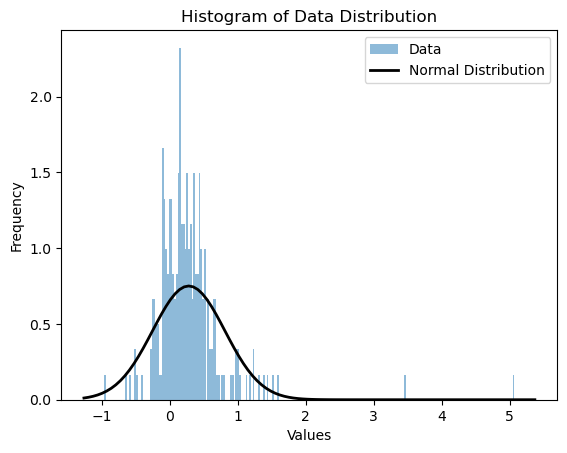

In [224]:
import scipy.stats as stats

# plot the histogram and the normal distribution curve
plt.hist(correlation_df['1 Day % Return'], bins=235, density=True, alpha=0.5, label='Data')
mu, std = stats.norm.fit(correlation_df['1 Day % Return'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# add labels and legend
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data Distribution')
plt.legend()

plt.show()


In [225]:
categorical_var = correlation_df['Investor sentiment']
continuous_var = correlation_df['1 Day % Return']

# perform the ANOVA test
f_statistic, p_value = stats.f_oneway(
    continuous_var[categorical_var == 'Bearish'],
    continuous_var[categorical_var == 'Neutral'],
    continuous_var[categorical_var == 'Bullish']
)

# print the results
print("F-statistic: ", f_statistic)
print("p-value: ", p_value)

F-statistic:  0.7314531458617428
p-value:  0.48231557559449945


# Clustering (Using PCA)

In [226]:
PCA_df = Final_IPO_df[['Ticker', 'Investor sentiment', 'Total Revenue', 'Gross Profit', 'Net Income', 'Cash from Ops',
       'Cash And Equivalents', 'Total Assets', 'Return on Assets %',
       'Cash And Equivalents as a percentage of Total assets',]].copy()

# Convert Investor sentiment column to one-hot encoded features
PCA_df['Investor sentiment'] = pd.get_dummies(PCA_df['Investor sentiment']).iloc[:, 0]

ticker_col = PCA_df['Ticker']

PCA_df.drop(['Ticker'], axis=1, inplace=True)
PCA_df

,Investor sentiment,Total Revenue,Gross Profit,Net Income,Cash from Ops,Cash And Equivalents,Total Assets,Return on Assets %,Cash And Equivalents as a percentage of Total assets
0,1,1080000,5.710000e+05,-30700000.0,-13600000.0,8.440000e+06,22979041.916168,-1.336,0.367291
1,0,6393600000,2.080500e+09,116600000.0,929800000.0,2.866000e+08,2486140724.946695,0.0469,0.115279
2,0,4452600000,2.395200e+09,-127100000.0,469600000.0,1.497200e+09,14970553592.461721,0.00849,0.10001
3,0,22200000,2.220000e+07,-92900000.0,-71000000.0,1.809000e+08,318150684.931507,-0.292,0.568598
4,0,75200000,5.390000e+07,-47400000.0,-42100000.0,6.950000e+07,280473372.781065,-0.169,0.247795
...,...,...,...,...,...,...,...,...,...
238,1,6540000.0,3.530000e+05,-1630000.0,194000.0,1.090000e+06,6197718.631179,-0.263,0.175871
239,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
PCA_df.dropna(inplace=True)


In [228]:
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# compute median values for each of the columns
PCA_df_median = PCA_df[['Investor sentiment', 'Total Revenue', 'Gross Profit', 'Net Income',
       'Cash from Ops', 'Cash And Equivalents', 'Total Assets',
       'Return on Assets %', 'Cash And Equivalents as a percentage of Total assets']].median()

# compute the interquartile range (IQR) of each column
q1 = PCA_df.quantile(0.25)
q3 = PCA_df.quantile(0.75)
iqr = q3 - q1

# compute the lower and upper bounds for outliers
lower_bounds = q1 - 1.5*iqr
upper_bounds = q3 + 1.5*iqr

In [229]:
PCA_df

,Investor sentiment,Total Revenue,Gross Profit,Net Income,Cash from Ops,Cash And Equivalents,Total Assets,Return on Assets %,Cash And Equivalents as a percentage of Total assets
0,1,1080000,5.710000e+05,-30700000.0,-13600000.0,8.440000e+06,22979041.916168,-1.336,0.367291
1,0,6393600000,2.080500e+09,116600000.0,929800000.0,2.866000e+08,2486140724.946695,0.0469,0.115279
2,0,4452600000,2.395200e+09,-127100000.0,469600000.0,1.497200e+09,14970553592.461721,0.00849,0.10001
3,0,22200000,2.220000e+07,-92900000.0,-71000000.0,1.809000e+08,318150684.931507,-0.292,0.568598
4,0,75200000,5.390000e+07,-47400000.0,-42100000.0,6.950000e+07,280473372.781065,-0.169,0.247795
...,...,...,...,...,...,...,...,...,...
234,0,2280000.0,1.430000e+06,-3440000.0,-1950000.0,9.050000e+05,7226890.756303,-0.476,0.125227
235,0,10800000.0,5.190000e+06,-338000.0,766000.0,3.140000e+06,89182058.047493,0.00379,0.035209
236,0,26400000.0,7.120000e+06,-2230000.0,-2670000.0,7.000000e+03,1776892.430279,1.255,0.003939
237,1,4520000.0,1.650000e+06,-4720000.0,-3900000.0,7.730000e+05,24329896.907216,-0.194,0.031772


In [230]:
PCA_df.to_csv('PCA_dataframe.csv', index=False)

In [231]:
def get_bounds(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

# Replace infinity and very large values with median
for col in PCA_df.columns:
    col_data = PCA_df[col].astype(str).str.replace(',', '').astype(np.float64) # Fix
    mask = np.logical_or(np.isinf(col_data), np.abs(col_data) > 1e10)
    PCA_df.loc[mask, col] = col_data.median()

# replace outliers with the median value of their respective column
cols = ['Investor sentiment', 'Total Revenue', 'Gross Profit', 'Net Income',
        'Cash from Ops', 'Cash And Equivalents', 'Total Assets',
        'Return on Assets %', 'Cash And Equivalents as a percentage of Total assets']
    
for col in cols:
    if col in PCA_df.columns:
        lower_bound, upper_bound = get_bounds(PCA_df[col])
        PCA_df[col] = np.where((PCA_df[col] < lower_bound) | (PCA_df[col] > upper_bound), PCA_df[col].median(), PCA_df[col])

# Fill remaining NaN values with median of respective column
medians = PCA_df.median()
PCA_df.fillna(medians, inplace=True)

# Scale features using RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(PCA_df)

# Perform PCA
pca = PCA()
pca.fit(X)

# Get PCA results
PC_scores = pca.transform(X)
PC_loadings = pca.components_

# Print explained variance ratio
print(pca.explained_variance_ratio_)


[0.33482198 0.22179314 0.1225858  0.10061314 0.06284114 0.05202644
 0.05141672 0.03391911 0.01998252]


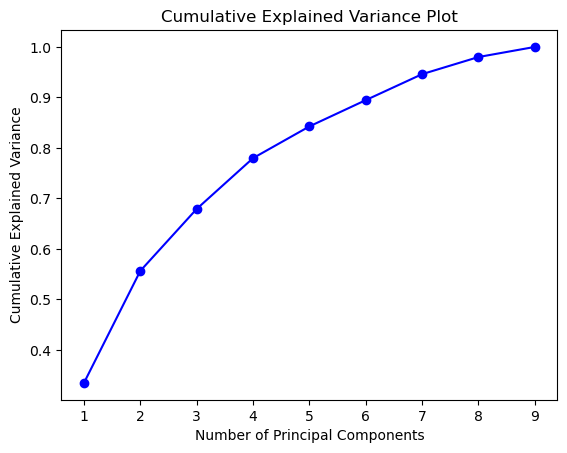

In [232]:
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA on data
pca = PCA()
pca.fit(X)

# Calculate cumulative explained variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, 'bo-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()


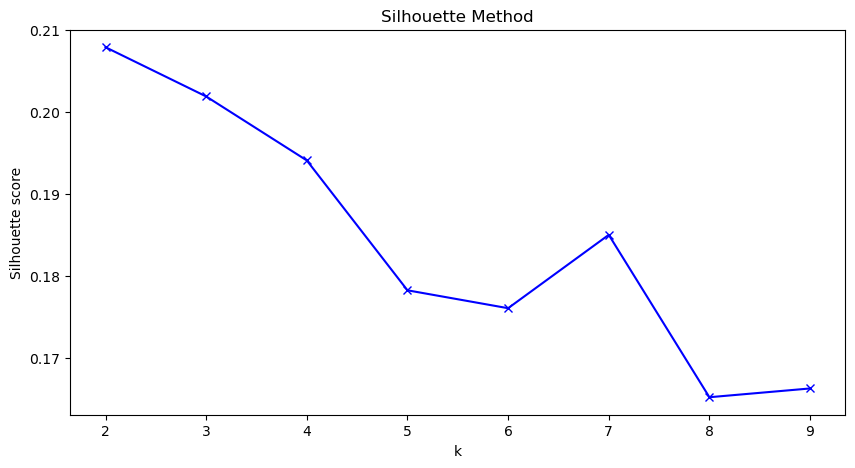

In [233]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine ideal number of clusters using silhouette method
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeanModel.fit_predict(PC_scores)
    silhouette_avg = silhouette_score(PC_scores, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette graph
plt.figure(figsize=(10,5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()


In [234]:
# Perform clustering with optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state = 420)
kmeans.fit(PC_scores)

# Add cluster labels to the original dataframe
PCA_df['Cluster'] = kmeans.labels_

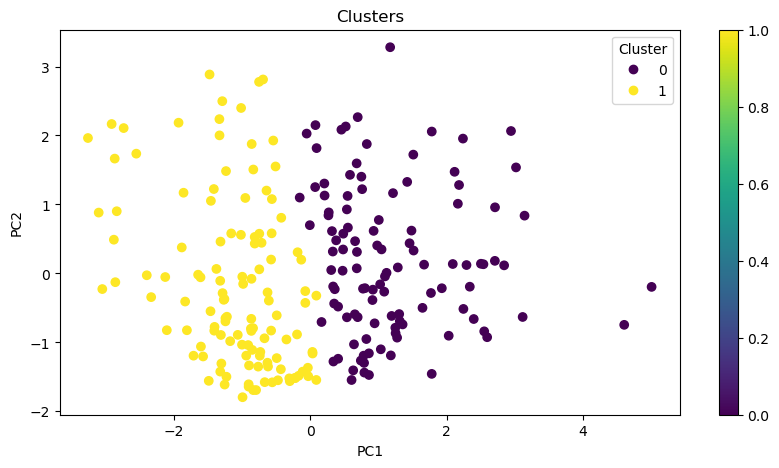

In [235]:
# Plot clusters with legends
plt.figure(figsize=(10,5))
scatter = plt.scatter(PC_scores[:,0], PC_scores[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters')
plt.colorbar(scatter)

# Add back the Ticker column
PCA_df['Ticker'] = ticker_col

# Add cluster labels to the original dataframe
PCA_df['Cluster'] = kmeans.labels_

# Create cluster legend
cluster_legend = plt.legend(handles=scatter.legend_elements()[0], labels=range(kmeans.n_clusters), title='Cluster')

plt.show()


In [236]:
PCA_df = PCA_df[['Ticker', 'Cluster','Investor sentiment', 'Total Revenue', 'Gross Profit', 'Net Income', 'Cash from Ops',       'Cash And Equivalents', 'Total Assets', 'Return on Assets %',       'Cash And Equivalents as a percentage of Total assets']]
PCA_df.to_csv('PCA_dataframe.csv', index=False)
# Group by cluster label and display tickers within each group
for label, group in PCA_df.groupby('Cluster'):
    print(f'Cluster {label}:')
    print(group[['Ticker', 'Investor sentiment', 'Total Revenue', 'Gross Profit', 'Net Income', 'Cash from Ops', 'Cash And Equivalents', 'Total Assets', 'Return on Assets %', 'Cash And Equivalents as a percentage of Total assets']].to_string(index=False))


Cluster 0:
       Ticker  Investor sentiment  Total Revenue  Gross Profit   Net Income  Cash from Ops  Cash And Equivalents  Total Assets  Return on Assets %  Cash And Equivalents as a percentage of Total assets
    NYSE:AVTR                 0.0    299900000.0   148900000.0  116600000.0     -4430000.0           286600000.0  2.486141e+09             0.04690                                              0.115279
  NasdaqGS:ZM                 0.0    622700000.0   507300000.0   25300000.0    151900000.0           283100000.0  2.621762e+09             0.00965                                              0.107981
NasdaqGS:CRWD                 0.0    481400000.0   339800000.0 -141800000.0     99900000.0           264800000.0  1.427996e+09            -0.09930                                              0.185435
NasdaqGS:PTON                 1.0    299900000.0   148900000.0  -71600000.0     -4430000.0           108500000.0  2.775194e+09            -0.02580                                       

In [237]:
#Conclusion and cluster evaluation
merged_df = pd.merge(df, PCA_df[['Ticker', 'Cluster']], on='Ticker', how='left')
merged_df

,Equity Offering Date,Investor sentiment,Company Name,Ticker,Security Name,Trading Status,Equity Security Type,IPO Exchange,Industry Classifications,State of Incorporation,...,Gross Margin % [T - 2],Gross Margin % [T - 1],Gross Margin % [T],Net Income Margin % [T - 2],Net Income Margin % [T - 1],Net Income Margin % [T],"Total Revenues, 3 Yr CAGR % [T] (%)","Gross Profit, 3 Yr CAGR % [T] (%)","Net Income, 3 Yr CAGR % [T] (%)",Cluster
0,2019-01-04,Bearish,"Super League Gaming, Inc.",NasdaqCM:SLGG,Common Stock,Active,Common Stock,Nasdaq,Communication Services (Primary),Delaware,...,0.527,0.585,0.43900,NM,NM,-1.778,1.235,1.419,NM,1.0
1,2019-02-08,Bullish,"Avantor, Inc.",NYSE:AVTR,Common Stock,Active,Common Stock,NYSE,Health Care (Primary),Delaware,...,0.325,0.339,0.34600,0.0182,0.0775,0.0914,0.0754,0.107,1.629,0.0
2,2019-02-13,Bullish,Levi Strauss & Co.,NYSE:LEVI,Class A Common Stock,Active,Common Stock,NYSE,Accessories (Primary),Delaware,...,0.538,0.579,0.57600,-0.0286,0.096,0.0923,0.0229,0.0463,0.13,1.0
3,2019-03-01,Bullish,"Precision BioSciences, Inc.",NasdaqGS:DTIL,Common Stock,Active,Common Stock,Nasdaq,Biotechnology (Primary),Delaware,...,1,1,1.00000,NM,NM,-0.265,1.198,1.198,NM,1.0
4,2019-03-04,Bullish,"Silk Road Medical, Inc",NasdaqGS:SILK,Common Stock,Active,Common Stock,Nasdaq,Health Care (Primary),Delaware,...,0.717,0.749,0.72700,-0.63,-0.491,-0.397,0.298,0.286,NM,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2022-01-25,Bearish,Yoshiharu Global Co.,NasdaqCM:YOSH,Class A Common Stock,Active,Common Stock,Nasdaq,Consumer Discretionary (Primary),Delaware,...,0.133,0.0276,0.05400,-0.0331,-0.142,-0.249,NM,NM,NM,1.0
239,2022-04-15,Bearish,"Actelis Networks, Inc.",NasdaqCM:ASNS,Common Stock,Active,Common Stock,Nasdaq,Communications Equipment (Primary),Delaware,...,NM,0.584,0.46500,NM,-0.176,-0.615,NM,NM,NM,NaN
240,2022-04-18,Bearish,Treasure Global Inc.,NasdaqCM:TGL,Common Stock,Active,Common Stock,Nasdaq,Advertising (Primary),Delaware,...,0.16,0.00998,0.00598,-0.414,-0.565,-0.147,NM,NM,NM,NaN
241,2022-09-02,Bearish,"Castellum, Inc.",NYSEAM:CTM,Common Stock,Active,Common Stock,NYSE,Information Technology (Primary),Nevada,...,NM,0.463,0.44200,NM,-0.203,-0.301,NM,NM,NM,NaN
